## Task 3. Algorithms for unconstrained nonlinear optimization. First- and second- order methods

### Section 1

In [1]:
import time
import math
import scipy
import numpy as np
import pandas as pd
from autograd import jacobian
import matplotlib.pyplot as plt
import seaborn as sns  
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = (100)

Params generation

In [2]:
alpha = float(np.random.random(1))
beta = float(np.random.random(1))
delta_k = np.random.standard_normal(100)

Data generation

In [3]:
x_k = np.arange(0, 100, 1)/100
y_k = alpha*x_k + beta + delta_k

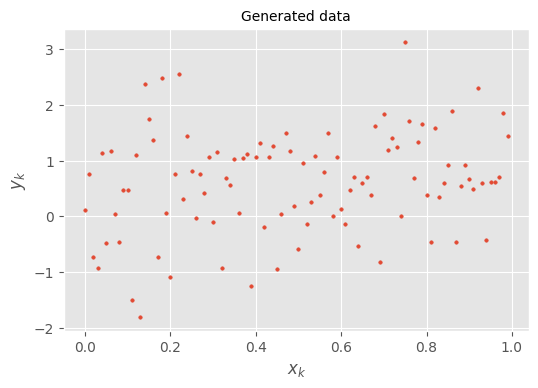

In [4]:
plt.scatter(x_k, y_k, s=6)
plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.title('Generated data', size=10)

fgnm = f'data.pdf'
plt.savefig("".join((fgnm)))
plt.show()

Implementing functions

In [5]:
def f_linear(x, a, b):
    return a*x + b
    
    
def f_rational(x, a, b):
    return a/(1+b*x)


def f_linear_lm(params, x_k):
    return params[0]*x_k + params[1]
    
    
def f_rational_lm(params, x_k):
    return params[0]/(1+params[1]*x_k)


def f_residuals(params, f):
    return f(params, x_k) - y_k


def f_loss(x, fit):
    result = 0
    for i in range(len(x_k)):
        result += (fit(x_k[i], x[0], x[1]) - y_k[i])**2
    return result

Implementing algorithms of first- and second- order methods

In [6]:
def gradient_descent_search(function, args):
    return scipy.optimize.minimize(function, x0=(0, 0), method='BFGS', args=(args,), tol=0.001)


def conj_gradient_descent_search(function, args):
    return scipy.optimize.minimize(function, x0=(0, 0), method='CG', args=(args,), tol=0.001)


def newtons_search(function, args):
    return scipy.optimize.minimize(function, x0=(0, 0), method='Newton-CG', jac=jacobian(function), args=(args,), tol=0.001)


def levenberg_marquardt_search(function, args):
    return scipy.optimize.least_squares(function, x0=(0, 0), method='lm', gtol=0.001, args=(args, ))

Execution

In [7]:
start_time = time.time()
res_grad = gradient_descent_search(f_loss, f_linear)
a_grad_desc, b_grad_desc = res_grad.x 
t_grad_desc = round(time.time() - start_time, 5)
iter_grad = res_grad.nit
loss_grad = f_loss([a_grad_desc, b_grad_desc], f_linear)


start_time = time.time()
res_conj = conj_gradient_descent_search(f_loss, f_linear)
a_conj_grad, b_conj_grad = res_conj.x
t_conj_grad = round(time.time() - start_time, 5)
iter_conj_grad = res_conj.nit
loss_conj = f_loss([a_conj_grad, b_conj_grad], f_linear)


start_time = time.time()
res_newtons = newtons_search(f_loss, f_linear)
a_newtons, b_newtons = res_newtons.x
t_newtons = round(time.time() - start_time, 5)
iter_newtons = res_newtons.nit
loss_newtons = f_loss([a_newtons, b_newtons], f_linear)


start_time = time.time()
res_lev = levenberg_marquardt_search(f_residuals, f_linear_lm)
a_levenberg_marquardt, b_levenberg_marquardt = res_lev.x
t_levenberg_marquardt = round(time.time() - start_time, 5)
iter_levenberg_marquardt = res_lev.nfev
loss_levenberg = f_loss([a_levenberg_marquardt, b_levenberg_marquardt], f_linear)

Visualization of results

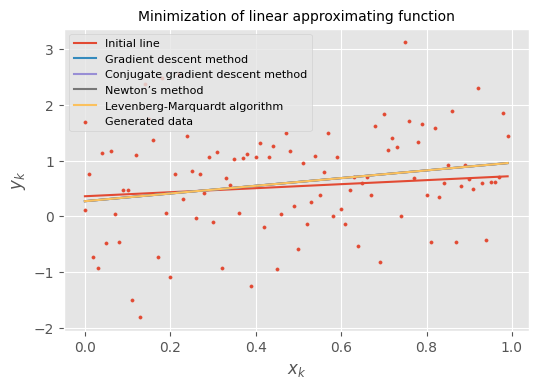

In [8]:
plt.scatter(x_k, y_k, s=5, label='Generated data')
plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.plot(x_k, alpha*x_k + beta, label='Initial line')
plt.plot(x_k, a_grad_desc*x_k + b_grad_desc, label='Gradient descent method')
plt.plot(x_k, a_conj_grad*x_k + b_conj_grad, label='Conjugate gradient descent method')
plt.plot(x_k, a_newtons*x_k + b_newtons, label='Newton’s method')
plt.plot(x_k, a_levenberg_marquardt*x_k + b_levenberg_marquardt, label='Levenberg-Marquardt algorithm')
plt.title('Minimization of linear approximating function', size=10)
plt.legend(fontsize=8)
fgnm = f'linear_approx.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [9]:
result1 = pd.DataFrame([
    ['Gradient descent method', loss_grad, a_grad_desc, b_grad_desc, iter_grad, t_grad_desc],
    ['Conjugate gradient descent method', loss_conj, a_conj_grad, b_conj_grad, iter_conj_grad, t_conj_grad], 
    ['Newton’s method', loss_newtons, a_newtons, b_newtons, iter_newtons, t_newtons],
    ['Levenberg-Marquardt algorithm', loss_levenberg, a_levenberg_marquardt, b_levenberg_marquardt, iter_levenberg_marquardt, t_levenberg_marquardt]], 
    columns=['Method', 'Loss', 'Value of a', 'Value of b' ,'Number of iterations', 'Execution time'])

In [10]:
print('Results of linear approximating function minimization')
result1

Results of linear approximating function minimization


,Method,Loss,Value of a,Value of b,Number of iterations,Execution time
0,Gradient descent method,79.530112,0.690920,0.272058,4,0.00636
1,Conjugate gradient descent method,79.530112,0.690921,0.272058,2,0.00509
2,Newton’s method,79.530112,0.690921,0.272058,2,2.28350
3,Levenberg-Marquardt algorithm,79.530112,0.690921,0.272058,6,0.00064


Execution

In [11]:
start_time = time.time()
res_grad = gradient_descent_search(f_loss, f_rational)
a_grad_desc_r, b_grad_desc_r = res_grad.x 
iter_grad_r = res_grad.nit
loss_grad_r = f_loss([a_grad_desc_r, b_grad_desc_r], f_linear)
t_grad_desc_r = round(time.time() - start_time, 5)


start_time = time.time()
res_conj = conj_gradient_descent_search(f_loss, f_rational)
a_conj_grad_r, b_conj_grad_r = res_conj.x 
t_conj_grad_r = round(time.time() - start_time, 5)
iter_conj_grad_r = res_conj.nit
loss_conj_r = f_loss([a_conj_grad_r, b_conj_grad_r], f_linear)


start_time = time.time()
res_newtons = newtons_search(f_loss, f_rational)
a_newtons_r, b_newtons_r = res_newtons.x
t_newtons_r = round(time.time() - start_time, 5)
iter_newtons_r = res_newtons.nit
loss_newtons_r = f_loss([a_newtons_r, b_newtons_r], f_linear)


start_time = time.time()
res_lev = levenberg_marquardt_search(f_residuals, f_rational_lm)
a_levenberg_marquardt_r, b_levenberg_marquardt_r = res_lev.x
t_levenberg_marquardt_r = round(time.time() - start_time, 5)
iter_levenberg_marquardt_r = res_lev.nfev
loss_levenberg_r = f_loss([a_levenberg_marquardt_r, b_levenberg_marquardt_r], f_linear)

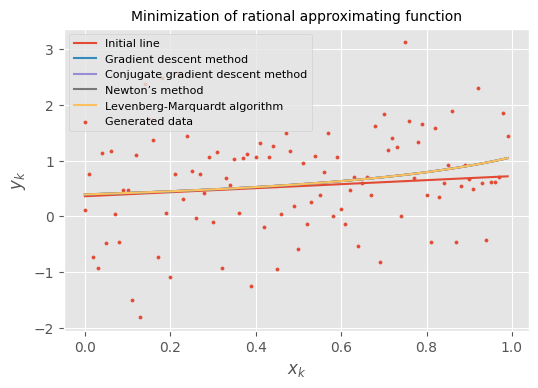

In [12]:
plt.scatter(x_k, y_k, s=5, label='Generated data')
plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.plot(x_k, alpha*x_k+beta, label='Initial line')
plt.plot(x_k, a_grad_desc_r/(1+b_grad_desc_r*x_k), label='Gradient descent method')
plt.plot(x_k, a_conj_grad_r/(1+b_conj_grad_r*x_k), label='Conjugate gradient descent method')
plt.plot(x_k, a_newtons_r/(1+b_newtons_r*x_k), label='Newton’s method')
plt.plot(x_k, a_levenberg_marquardt_r/(1+b_levenberg_marquardt_r*x_k), label='Levenberg-Marquardt algorithm')
plt.title('Minimization of rational approximating function', size=10)
plt.legend(fontsize=8)
fgnm = f'rational_approx.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [13]:
result2 = pd.DataFrame([
    ['Gradient descent method', loss_grad_r, a_grad_desc_r, b_grad_desc_r, iter_grad_r, t_grad_desc_r],
    ['Conjugate gradient descent method', loss_conj_r, a_conj_grad_r, b_conj_grad_r, iter_conj_grad_r, t_conj_grad_r], 
    ['Newton’s method', loss_newtons_r, a_newtons_r, b_newtons_r, iter_newtons_r, t_newtons_r],
    ['Levenberg-Marquardt algorithm', loss_levenberg_r, a_levenberg_marquardt_r, b_levenberg_marquardt_r, iter_levenberg_marquardt_r, t_levenberg_marquardt_r]], 
    columns=['Method', 'Loss', 'Value of a', 'Value of b' ,'Number of iterations', 'Execution time'])

In [14]:
print('Results of linear approximating function minimization')
result2

Results of linear approximating function minimization


,Method,Loss,Value of a,Value of b,Number of iterations,Execution time
0,Gradient descent method,190.312380,0.393555,-0.629772,11,0.02409
1,Conjugate gradient descent method,190.312434,0.393555,-0.629772,9,0.02108
2,Newton’s method,190.312318,0.393555,-0.629772,10,1.06943
3,Levenberg-Marquardt algorithm,190.348666,0.393483,-0.629908,25,0.00078


### Section 2

Implementing algorithms of direct optimization

In [10]:
def bruteforce_two_dim(f, bounds, eps=1e-3, fix=None, x0=0.0, **kwargs):
    
    x_min = bounds[0]
    x = [x_min, x0]
    f_min = f(x[::fix], **kwargs)  
    
    x_lst = np.arange(bounds[0], bounds[1]+eps, eps)
        
    for xi in x_lst:
        x[0] = xi
        f_x = f(x[::fix], **kwargs) 
        if f_x < f_min:
            f_min = f_x
            x_min = xi
            
    return x_min, f_min


def bruteforce_search(function, args):
    return scipy.optimize.brute(function, ranges=(slice(0, 1, 0.001), (slice(0, 1, 0.001))), args=(args,))


def gauss_bruteforce(f, bnds, x0, eps, **kwargs):
    x1, f1 = bruteforce_two_dim(f, fix=1, x0=x0[1], bounds=bnds[0], **kwargs) # zero iteration
    x2, f2 = bruteforce_two_dim(f, fix=-1, x0=x1, bounds=bnds[1], **kwargs)
    
    while abs(f1 - f2) >= eps:
        x1, f1  = bruteforce_two_dim(f, fix=1, x0=x2, bounds=bnds[0], **kwargs)
        x2, f2  = bruteforce_two_dim(f, fix=-1, x0=x1, bounds=bnds[1], **kwargs)
    return x1, x2


def neldermead_search(function, args):
    return scipy.optimize.minimize(function, x0=(0, 0), method='Nelder-Mead', args=(args,))

Apply algorithms and calculate execution time and the number of iterations

In [12]:
start_time = time.time()
a_bruteforce, b_bruteforce = bruteforce_search(f_loss, f_linear)
t_bruteforce = round(time.time() - start_time, 5)


start_time = time.time()
a_gauss, b_gauss = gauss_bruteforce(f_loss, [[0, 1], [0, 1]], x0=[0.0, 0.0], fit=f_linear, eps=1e-3)
t_gauss = round(time.time() - start_time, 5)


start_time = time.time()
a_neldermead, b_neldermead = neldermead_search(f_loss, f_linear).x
t_neldermead = round(time.time() - start_time , 5)

Vizualization of results

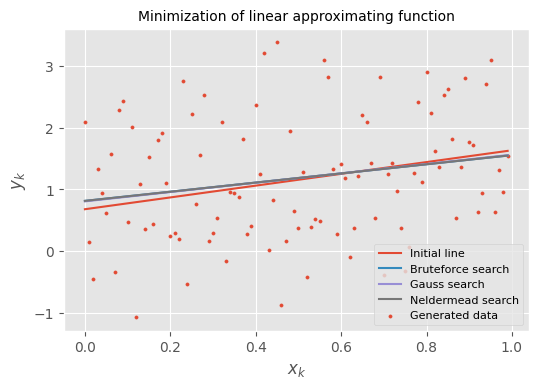

In [16]:
plt.scatter(x_k, y_k, s=5, label='Generated data')

plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.plot(x_k, alpha*x_k + beta, label='Initial line')
plt.plot(x_k, a_bruteforce*x_k + b_bruteforce, label='Bruteforce search')
plt.plot(x_k, a_gauss*x_k + b_gauss, label='Gauss search')
plt.plot(x_k, a_neldermead*x_k + b_neldermead, label='Neldermead search')
plt.title('Minimization of linear approximating function', size=10)
plt.legend(fontsize=8)

fgnm = f'linear_approx.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [ ]:
result3 = pd.DataFrame([
    ['Bruteforce search', loss_grad, a_grad_desc, b_grad_desc, iter_grad, t_grad_desc],
    ['Gauss search', loss_conj, a_conj_grad, b_conj_grad, iter_conj_grad, t_conj_grad], 
    ['Neldermead search', loss_newtons, a_newtons, b_newtons, iter_newtons, t_newtons]], 
    columns=['Method', 'Loss', 'Value of a', 'Value of b' ,'Number of iterations', 'Execution time'])

In [18]:
start_time = time.time()
a_bruteforce_r, b_bruteforce_r = bruteforce_search(f_loss, f_rational)
t_bruteforce_r = round(time.time() - start_time, 5)


start_time = time.time()
a_gauss_r, b_gauss_r = gauss_bruteforce(f_loss, [[-1, 1], [-1, 1]], x0=[0.0, 0.0], fit=f_rational, eps=1e-3)
t_gauss_r = round(time.time() - start_time, 5)

start_time = time.time()
neldermead_result_r = neldermead_search(f_loss, f_rational)
a_neldermead_r, b_neldermead_r = neldermead_result.x
t_neldermead = round(time.time() - start_time , 5)

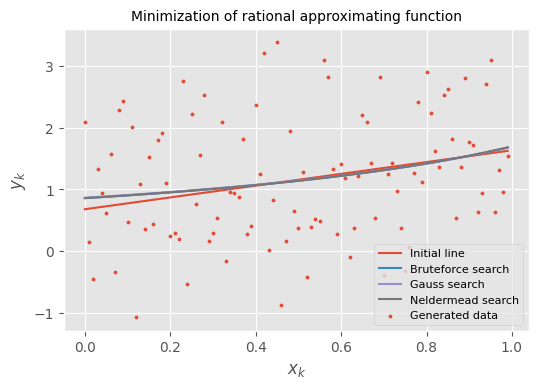

In [21]:
plt.scatter(x_k, y_k, s=5, label='Generated data')

plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.plot(x_k, alpha*x_k+beta, label='Initial line')
plt.plot(x_k, a_bruteforce_r/(1+b_bruteforce_r*x_k), label='Bruteforce search')
plt.plot(x_k, a_gauss_r/(1+b_gauss_r*x_k), label='Gauss search')
plt.plot(x_k, a_neldermead_r/(1+b_neldermead_r*x_k), label='Neldermead search')
plt.title('Minimization of rational approximating function', size=10)
plt.legend(fontsize=8)
fgnm = f'rational_approx.pdf'
plt.savefig("".join((fgnm)))
plt.show()